In [1]:
import pandas as pd
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
import seaborn as sns


from protein_lm.modeling.scripts.infer import PTMMamba

ckpt_path = "/workspace/ckpt/bi_mamba-esm-ptm_token_input/best.ckpt"
mamba = PTMMamba(ckpt_path,device='cuda:0')



/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<All keys matched successfully>


In [2]:

df = pd.read_csv('/workspace/protein_lm/evaluation/binding_site_prediction/data/ptm_data.csv')

df = df.sample(100)


In [103]:
seqs = df['wt_seq']
ptm_seqs = df['ptm_seq']
acids = df['AC_ID']
logits = []
ptm_tokens = []
wt_tokens = []
wt_seq_tokens = []
pred_tokens = []
acid_list = []
position_ids = []

In [104]:
from tqdm import tqdm
from copy import deepcopy
c = 0
for wt_seq, ptm_seq, acid in zip(seqs, ptm_seqs,acids):
    wt_input_ids = mamba.tokenizer.encode(wt_seq)
    ptm_input_ids = mamba.tokenizer.encode(ptm_seq)
    mask_id = mamba.tokenizer.ids_to_tokens.index('<mask>')
    for i in tqdm(range(len(wt_input_ids))):
        wt_id = wt_input_ids[i]
        ptm_seq_id = ptm_input_ids[i]
        wt_input_ids_cp = deepcopy(wt_input_ids)
        wt_input_ids_cp[i] = mask_id
        masked_seq = mamba.tokenizer.decode(wt_input_ids)
        wt_logits = mamba(masked_seq).logits[0]
        logit = wt_logits[i]
        pred_token =logit.softmax(-1).argmax()
        if (pred_token > mamba.tokenizer.ids_to_tokens.index('PTM')) and \
            ptm_seq_id == pred_token:
            print(pred_token)
            if pred_token in pred_tokens:
                continue
            logits.append(logit)
            ptm_tokens.append(ptm_seq_id)
            wt_tokens.append(wt_id)
            pred_tokens.append(pred_token)
            acid_list.append(acid)
            position_ids.append(i+1)
            l = max(i-2,0)
            r = min(i+3,len(wt_input_ids))
            print(l,i,r)
            wt_seq_tokens.append(wt_input_ids[l:r])
            c += 1
        if c > 10:
            break
    if c > 10:
        break
        


 14%|█▍        | 60/428 [00:03<00:24, 15.15it/s]

tensor(34, device='cuda:0')
55 57 60


 23%|██▎       | 98/428 [00:06<00:21, 15.48it/s]

tensor(34, device='cuda:0')


 54%|█████▍    | 150/279 [00:09<00:08, 15.86it/s]

tensor(34, device='cuda:0')


 70%|██████▉   | 194/279 [00:12<00:05, 15.81it/s]

tensor(34, device='cuda:0')


 72%|███████▏  | 200/279 [00:12<00:04, 15.81it/s]

tensor(34, device='cuda:0')


 87%|████████▋ | 242/279 [00:15<00:02, 15.72it/s]

tensor(34, device='cuda:0')


  8%|▊         | 22/291 [00:01<00:17, 15.80it/s]

tensor(42, device='cuda:0')
17 19 22


 14%|█▍        | 92/646 [00:06<00:36, 15.05it/s]

tensor(36, device='cuda:0')
86 88 91


 15%|█▍        | 96/646 [00:06<00:36, 15.05it/s]

tensor(36, device='cuda:0')


 17%|█▋        | 110/646 [00:07<00:35, 15.15it/s]

tensor(36, device='cuda:0')


 79%|███████▊  | 240/305 [00:15<00:04, 15.61it/s]

tensor(34, device='cuda:0')


 74%|███████▍  | 710/957 [00:48<00:16, 14.53it/s]

tensor(43, device='cuda:0')
705 707 710


  2%|▏         | 12/790 [00:00<00:52, 14.85it/s]

tensor(36, device='cuda:0')


  2%|▏         | 16/790 [00:01<00:52, 14.83it/s]

tensor(36, device='cuda:0')


 15%|█▌        | 120/790 [00:08<00:44, 14.92it/s]

tensor(36, device='cuda:0')


 20%|██        | 126/619 [00:08<00:32, 15.07it/s]

tensor(45, device='cuda:0')
121 123 126


 69%|██████▉   | 344/498 [00:22<00:09, 15.54it/s]

tensor(36, device='cuda:0')


  7%|▋         | 36/481 [00:02<00:28, 15.53it/s]

tensor(36, device='cuda:0')


 27%|██▋       | 128/481 [00:08<00:22, 15.53it/s]

tensor(36, device='cuda:0')


 65%|██████▍   | 312/481 [00:20<00:11, 15.36it/s]

tensor(37, device='cuda:0')
306 308 311


 94%|█████████▎| 450/481 [00:29<00:02, 15.46it/s]

tensor(36, device='cuda:0')


 94%|█████████▍| 454/481 [00:29<00:01, 15.46it/s]

tensor(37, device='cuda:0')


 96%|█████████▋| 464/481 [00:29<00:01, 15.45it/s]

tensor(36, device='cuda:0')


 99%|█████████▉| 476/481 [00:30<00:00, 15.47it/s]

tensor(36, device='cuda:0')


 60%|█████▉    | 306/514 [00:19<00:13, 15.45it/s]

tensor(46, device='cuda:0')
301 303 306


 68%|██████▊   | 352/514 [00:22<00:10, 15.44it/s]

tensor(43, device='cuda:0')


  1%|          | 8/790 [00:00<00:52, 14.81it/s]

tensor(36, device='cuda:0')


  3%|▎         | 24/790 [00:01<00:51, 14.91it/s]

tensor(37, device='cuda:0')
tensor(36, device='cuda:0')


 26%|██▌       | 202/790 [00:13<00:39, 14.86it/s]

tensor(36, device='cuda:0')


 26%|██▌       | 206/790 [00:13<00:39, 14.87it/s]

tensor(40, device='cuda:0')
201 203 206


 89%|████████▊ | 700/790 [00:47<00:06, 14.81it/s]

tensor(40, device='cuda:0')


 13%|█▎        | 38/298 [00:02<00:16, 15.52it/s]

tensor(36, device='cuda:0')
tensor(36, device='cuda:0')


 31%|███       | 156/502 [00:10<00:22, 15.41it/s]

tensor(34, device='cuda:0')


 33%|███▎      | 166/502 [00:10<00:21, 15.37it/s]

tensor(34, device='cuda:0')


 38%|███▊      | 192/502 [00:12<00:20, 15.33it/s]

tensor(34, device='cuda:0')


 42%|████▏     | 212/502 [00:13<00:18, 15.44it/s]

tensor(34, device='cuda:0')


 51%|█████▏    | 258/502 [00:16<00:15, 15.45it/s]

tensor(34, device='cuda:0')


 54%|█████▍    | 270/502 [00:17<00:15, 15.43it/s]

tensor(34, device='cuda:0')


 75%|███████▍  | 374/502 [00:24<00:08, 15.45it/s]

tensor(34, device='cuda:0')


 80%|████████  | 404/502 [00:26<00:06, 15.40it/s]

tensor(34, device='cuda:0')


 88%|████████▊ | 444/502 [00:28<00:03, 15.45it/s]

tensor(34, device='cuda:0')


 21%|██        | 140/678 [00:09<00:35, 15.05it/s]

tensor(34, device='cuda:0')


 55%|█████▍    | 372/678 [00:24<00:20, 14.99it/s]

tensor(34, device='cuda:0')


 66%|██████▋   | 450/678 [00:30<00:15, 15.02it/s]

tensor(34, device='cuda:0')


 88%|████████▊ | 594/678 [00:39<00:05, 15.07it/s]

tensor(34, device='cuda:0')


 91%|█████████ | 618/678 [00:41<00:04, 14.99it/s]

tensor(34, device='cuda:0')


 39%|███▊      | 44/114 [00:02<00:04, 15.92it/s]

tensor(34, device='cuda:0')


  2%|▏         | 16/747 [00:01<00:48, 15.00it/s]

tensor(36, device='cuda:0')


  4%|▎         | 28/747 [00:01<00:47, 14.98it/s]

tensor(36, device='cuda:0')
tensor(36, device='cuda:0')


  7%|▋         | 50/747 [00:03<00:46, 14.93it/s]

tensor(36, device='cuda:0')


 22%|██▏       | 164/747 [00:10<00:39, 14.89it/s]

tensor(36, device='cuda:0')


 23%|██▎       | 174/747 [00:11<00:38, 14.92it/s]

tensor(36, device='cuda:0')


 32%|███▏      | 240/747 [00:16<00:33, 14.97it/s]

tensor(40, device='cuda:0')


 58%|█████▊    | 432/747 [00:28<00:20, 15.02it/s]

tensor(40, device='cuda:0')


 69%|██████▉   | 516/747 [00:34<00:15, 14.90it/s]

tensor(40, device='cuda:0')


 71%|███████   | 532/747 [00:35<00:14, 14.98it/s]

tensor(37, device='cuda:0')


 72%|███████▏  | 538/747 [00:35<00:13, 14.94it/s]

tensor(36, device='cuda:0')


 73%|███████▎  | 546/747 [00:36<00:13, 14.96it/s]

tensor(37, device='cuda:0')


 82%|████████▏ | 612/747 [00:40<00:09, 14.97it/s]

tensor(40, device='cuda:0')


 89%|████████▉ | 664/747 [00:44<00:05, 15.02it/s]

tensor(36, device='cuda:0')


  4%|▎         | 36/983 [00:02<01:04, 14.65it/s]

tensor(34, device='cuda:0')


 25%|██▍       | 244/983 [00:16<00:50, 14.72it/s]

tensor(34, device='cuda:0')


 26%|██▌       | 258/983 [00:17<00:49, 14.72it/s]

tensor(34, device='cuda:0')


 29%|██▉       | 288/983 [00:19<00:47, 14.63it/s]

tensor(34, device='cuda:0')


 30%|███       | 296/983 [00:20<00:47, 14.60it/s]

tensor(34, device='cuda:0')


 31%|███▏      | 308/983 [00:21<00:46, 14.67it/s]

tensor(34, device='cuda:0')


 50%|█████     | 494/983 [00:33<00:33, 14.54it/s]

tensor(34, device='cuda:0')


 54%|█████▍    | 530/983 [00:36<00:30, 14.66it/s]

tensor(34, device='cuda:0')


 60%|█████▉    | 586/983 [00:40<00:26, 14.80it/s]

tensor(34, device='cuda:0')


  9%|▉         | 30/326 [00:01<00:18, 15.76it/s]

tensor(34, device='cuda:0')


 27%|██▋       | 88/326 [00:05<00:15, 15.74it/s]

tensor(34, device='cuda:0')


 86%|████████▌ | 280/326 [00:17<00:02, 15.61it/s]

tensor(34, device='cuda:0')


 41%|████      | 284/700 [00:18<00:27, 15.03it/s]

tensor(37, device='cuda:0')


 49%|████▉     | 616/1251 [00:55<00:57, 11.11it/s]

tensor(36, device='cuda:0')


 50%|█████     | 626/1251 [00:56<00:56, 11.14it/s]

tensor(36, device='cuda:0')


 65%|██████▌   | 818/1251 [01:13<00:38, 11.16it/s]

tensor(34, device='cuda:0')


 66%|██████▌   | 822/1251 [01:13<00:38, 11.15it/s]

tensor(34, device='cuda:0')


 70%|███████   | 878/1251 [01:18<00:33, 11.15it/s]


KeyboardInterrupt: 

In [105]:
wt_tokens

[21, 27, 12, 19, 19, 15, 19, 19]

In [106]:
# logits = []
# ptm_tokens = []
# wt_tokens = []
# wt_seq_tokens = []
# pred_tokens = []
seq_labels = [mamba.tokenizer.decode(wt_seq_tokens[i]) for i in range(len(wt_seq_tokens))]
wt_token_labels = [mamba.tokenizer.decode([wt_tokens[i]]) for i in range(len(wt_tokens))]
wt_token_labels, seq_labels

(['N', 'C', 'S', 'K', 'K', 'T', 'K', 'K'],
 ['NVNCT', 'AGCDY', 'LGSPY', 'LHKTF', 'CDKIT', 'MKTFC', 'FLKEA', 'YLKRR'])

In [107]:
labels = [f"{acid} ({letter}{pos})" for acid, letter, pos in zip(acid_list, wt_token_labels, position_ids)]
labels

['Q09324 (N58)',
 'Q4L7X2 (C20)',
 'Q02261 (S89)',
 'Q32BW5 (K708)',
 'Q1GTW7 (K124)',
 'P47197 (T309)',
 'Q17QF0 (K304)',
 'Q3UYV9 (K204)']

In [108]:
ptm_logits = [logit.cpu().numpy()[mamba.tokenizer.ids_to_tokens.index('PTM')+1:] for logit in logits]
ptm_annotations = mamba.tokenizer.ids_to_tokens[mamba.tokenizer.ids_to_tokens.index('PTM')+1:]

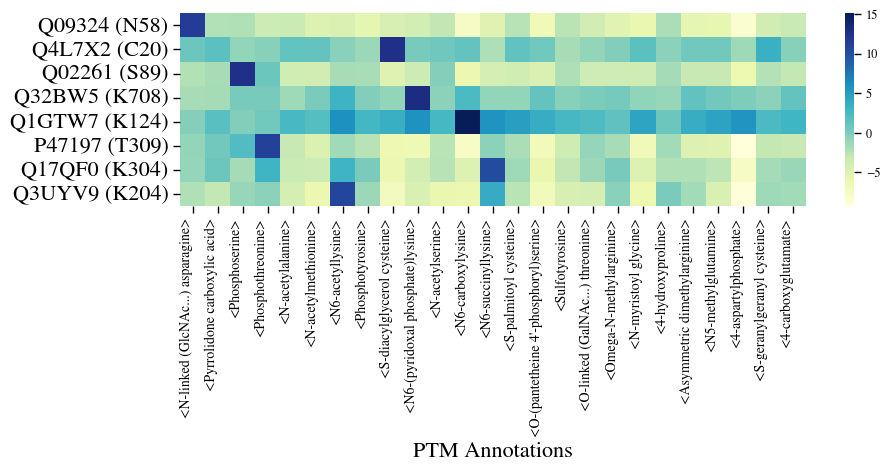

In [109]:

plot_settings = {'ytick.labelsize': 16,
                        'xtick.labelsize': 16,
                        'font.size': 22,
                        'figure.figsize': (10, 5),
                        'axes.titlesize': 22,
                        'axes.labelsize': 18,
                        'lines.linewidth': 2,
                        'lines.markersize': 3,
                        'legend.fontsize': 11,
                        'mathtext.fontset': 'stix',
                        'font.family': 'STIXGeneral'}
plt.style.use(plot_settings)
# Set the seaborn style and font scale for publication
# Set the seaborn style and font scale for publication
# sns.set(style="whitegrid", font_scale=1.2, )
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16})


ptm_logits = np.array(ptm_logits)
# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(ptm_logits, annot=False, fmt=".2f", cmap="YlGnBu", xticklabels=ptm_annotations, yticklabels=labels)
plt.xticks(rotation=90, ha="right",fontsize=10)
plt.yticks(rotation=0,fontsize=16)
plt.xlabel("PTM Annotations")
plt.tight_layout()
plt.show()


In [64]:
seq_labels
acid_list
logits=[logit.cpu()[mamba.tokenizer.ids_to_tokens.index('PTM')+1:] for logit in logits]

['Q09324', 'Q4L7X2', 'Q02261', 'Q32BW5', 'Q1GTW7', 'P47197']